# 데이터 확인하기 

- 아이템별 지표확인 
- 시간별 지역별 판매 지표 확인하기

In [1]:
import numpy as np
import pandas as pd
# 그래프 
import seaborn as sns
COLORS = sns.color_palette()
%matplotlib inline

In [6]:
df_retail = pd.read_csv('./output/OnlineRetailClean.csv', dtype=dtypes)

In [3]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int64  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float64
 7   CustomerID     397884 non-null  int64  
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 30.4+ MB


In [4]:
dtypes = {
    'UniPrice': np.float32,
    'CustomerID': np.int32,
    'Quantity': np.int32
}

In [7]:
# 변경 된 것을 확인  
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     397884 non-null  int64  
 1   InvoiceNo      397884 non-null  int64  
 2   StockCode      397884 non-null  object 
 3   Description    397884 non-null  object 
 4   Quantity       397884 non-null  int32  
 5   InvoiceDate    397884 non-null  object 
 6   UnitPrice      397884 non-null  float64
 7   CustomerID     397884 non-null  int32  
 8   Country        397884 non-null  object 
 9   CheckoutPrice  397884 non-null  float64
dtypes: float64(2), int32(2), int64(2), object(4)
memory usage: 27.3+ MB


In [9]:
df_retail['InvoiceDate'] = pd.to_datetime(df_retail['InvoiceDate'], infer_datetime_format=True)

In [11]:
df_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397884 entries, 0 to 397883
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     397884 non-null  int64         
 1   InvoiceNo      397884 non-null  int64         
 2   StockCode      397884 non-null  object        
 3   Description    397884 non-null  object        
 4   Quantity       397884 non-null  int32         
 5   InvoiceDate    397884 non-null  datetime64[ns]
 6   UnitPrice      397884 non-null  float64       
 7   CustomerID     397884 non-null  int32         
 8   Country        397884 non-null  object        
 9   CheckoutPrice  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(2), int64(2), object(3)
memory usage: 27.3+ MB


- 전체 매출 
- 국가별 매출
- 월별 매출 
- 요일별 매출 
- 시간별 매출 

In [6]:
# 전체 매출 
total_revenue = df_retail['CheckoutPrice'].sum()
total_revenue

8911407.904

In [14]:
# 국가별 매출 
rev_by_countries = df_retail.groupby('Country').sum()['CheckoutPrice'].sort_values()

In [15]:
rev_by_countries

Country
Saudi Arabia            1.459200e+02
Bahrain                 5.484000e+02
Czech Republic          8.267400e+02
RSA                     1.002310e+03
Brazil                  1.143600e+03
European Community      1.300250e+03
Lithuania               1.661060e+03
Lebanon                 1.693880e+03
United Arab Emirates    1.902280e+03
Unspecified             2.667070e+03
Malta                   2.725590e+03
USA                     3.580390e+03
Canada                  3.666380e+03
Iceland                 4.310000e+03
Greece                  4.760520e+03
Israel                  7.221690e+03
Poland                  7.334650e+03
Austria                 1.019868e+04
Cyprus                  1.359038e+04
Italy                   1.748324e+04
Denmark                 1.895534e+04
Channel Islands         2.045044e+04
Singapore               2.127929e+04
Finland                 2.254608e+04
Portugal                3.343989e+04
Norway                  3.616544e+04
Japan                   3.7416

[Text(0, 0, 'Saudi Arabia'),
 Text(0, 0, 'Bahrain'),
 Text(0, 0, 'Czech Republic'),
 Text(0, 0, 'RSA'),
 Text(0, 0, 'Brazil'),
 Text(0, 0, 'European Community'),
 Text(0, 0, 'Lithuania'),
 Text(0, 0, 'Lebanon'),
 Text(0, 0, 'United Arab Emirates'),
 Text(0, 0, 'Unspecified'),
 Text(0, 0, 'Malta'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Iceland'),
 Text(0, 0, 'Greece'),
 Text(0, 0, 'Israel'),
 Text(0, 0, 'Poland'),
 Text(0, 0, 'Austria'),
 Text(0, 0, 'Cyprus'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'Denmark'),
 Text(0, 0, 'Channel Islands'),
 Text(0, 0, 'Singapore'),
 Text(0, 0, 'Finland'),
 Text(0, 0, 'Portugal'),
 Text(0, 0, 'Norway'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'France'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'EIRE'),
 Text(0, 0, 'Netherlands'),
 Text(0, 0, 'United Kingdom')]

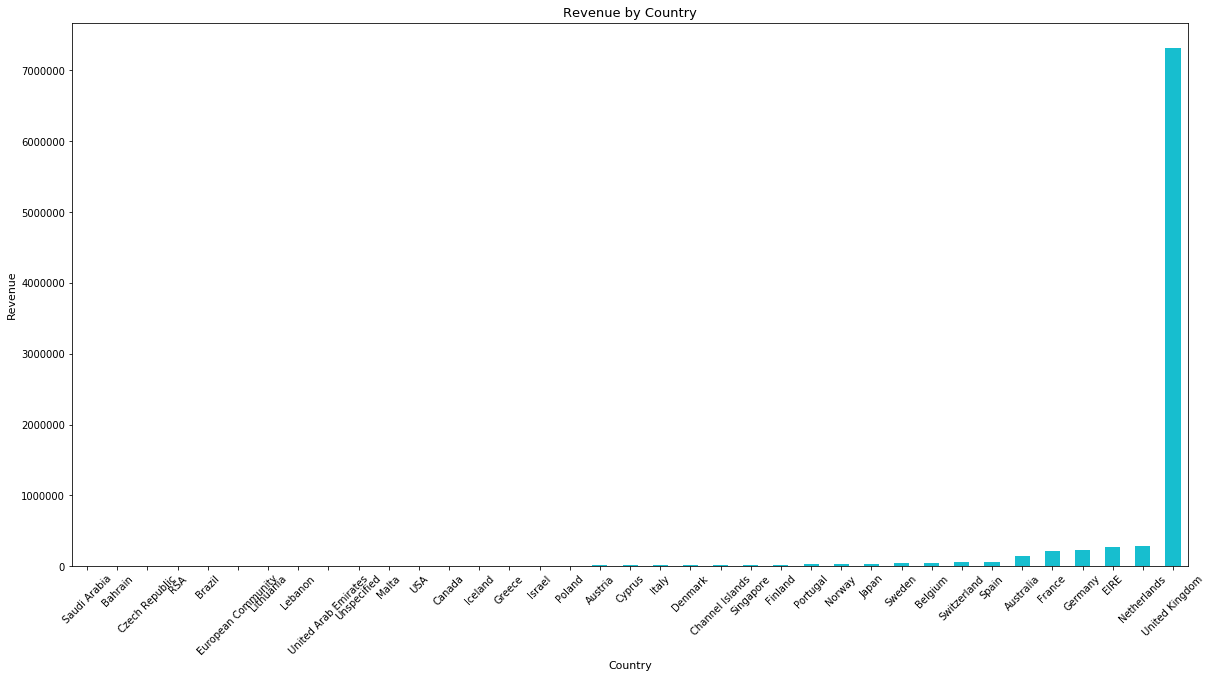

In [18]:
plot = rev_by_countries.plot(kind='bar', color = COLORS[-1], figsize=(20, 10))
plot.set_xlabel('Country', fontsize=11)
plot.set_ylabel('Revenue', fontsize=11)
plot.set_title('Revenue by Country', fontsize=13)
plot.set_xticklabels(labels = rev_by_countries.index, rotation=45)

In [ ]:
def plot_def():
    pass 